<a href="https://colab.research.google.com/github/samharsh02/Breast-Cancer-Detection/blob/main/breast_cancer_wisconsin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing  Libraries

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix


In [ ]:
# URL of the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

df = pd.read_csv(url, header=None)

# Display the first few rows of the DataFrame
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Datapreprocessing

In [ ]:
df.shape

(569, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    int64  
 1   1       569 non-null    object 
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float64
 22  22

In [ ]:
# Check Duplication
df.duplicated().sum()

0

- There aren't duplicate values

In [ ]:
# check Missing value
df.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
dtype: int64

- No Missing Value is available

In [ ]:
# Check the number of unique values of each column
df.nunique()

0     569
1       2
2     456
3     479
4     522
5     539
6     474
7     537
8     537
9     542
10    432
11    499
12    540
13    519
14    533
15    528
16    547
17    541
18    533
19    507
20    498
21    545
22    457
23    511
24    514
25    544
26    411
27    529
28    539
29    492
30    500
31    535
dtype: int64

- Dropping the id and Unnamed: 32 columns which will not provide any information for our model

In [ ]:
df = df.drop([0], axis= 1)


- Changed the name of the diagnostic column to target!

In [ ]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df = df.rename(columns={1 : 'target'})

- changed target data in the dataset. I changed malignant to 1 and benign to 0.

In [ ]:
df.target.replace({'M' : '1','B': '0'},inplace=True)
df.head()

,target,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Converting target type to float64
df.target = df.target.astype('float64')

### Let's check the last version of our dataset after our processing.

In [ ]:
df.head()

,target,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,1.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.tail()

,target,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
564,1.0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1.0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1.0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1.0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,0.0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  569 non-null    float64
 1   2       569 non-null    float64
 2   3       569 non-null    float64
 3   4       569 non-null    float64
 4   5       569 non-null    float64
 5   6       569 non-null    float64
 6   7       569 non-null    float64
 7   8       569 non-null    float64
 8   9       569 non-null    float64
 9   10      569 non-null    float64
 10  11      569 non-null    float64
 11  12      569 non-null    float64
 12  13      569 non-null    float64
 13  14      569 non-null    float64
 14  15      569 non-null    float64
 15  16      569 non-null    float64
 16  17      569 non-null    float64
 17  18      569 non-null    float64
 18  19      569 non-null    float64
 19  20      569 non-null    float64
 20  21      569 non-null    float64
 21  22      569 non-null    float64
 22  23

In [ ]:
# Check statistic of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
target,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
2,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
3,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
4,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
5,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
6,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
7,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
8,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
9,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
10,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


# Analysis & EDA

In [ ]:
# I looked at how many benign and malignant yields there are.
df.target.value_counts()

0.0    357
1.0    212
Name: target, dtype: int64

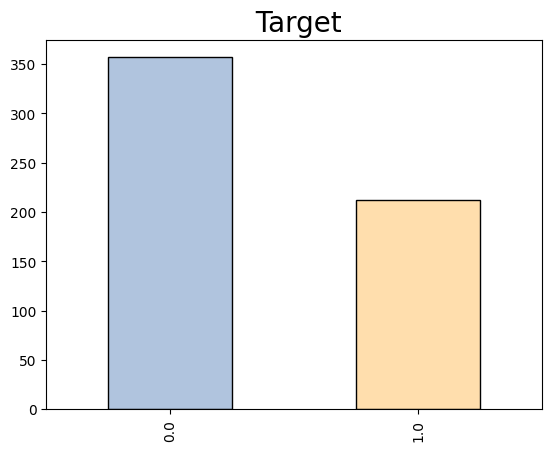

In [ ]:
# visualized target data in the dataset.
df['target'].value_counts().plot(kind='bar',edgecolor='black',color=['lightsteelblue','navajowhite'])
plt.title(" Target",fontsize=20)
plt.show()

- 1-->Malignant
- 0-->Benign

In [ ]:
# Correlation Analysis
cor = df.corr()
cor

,target,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
target,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
2,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
3,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
4,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
5,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
6,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
7,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
8,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
9,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
10,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


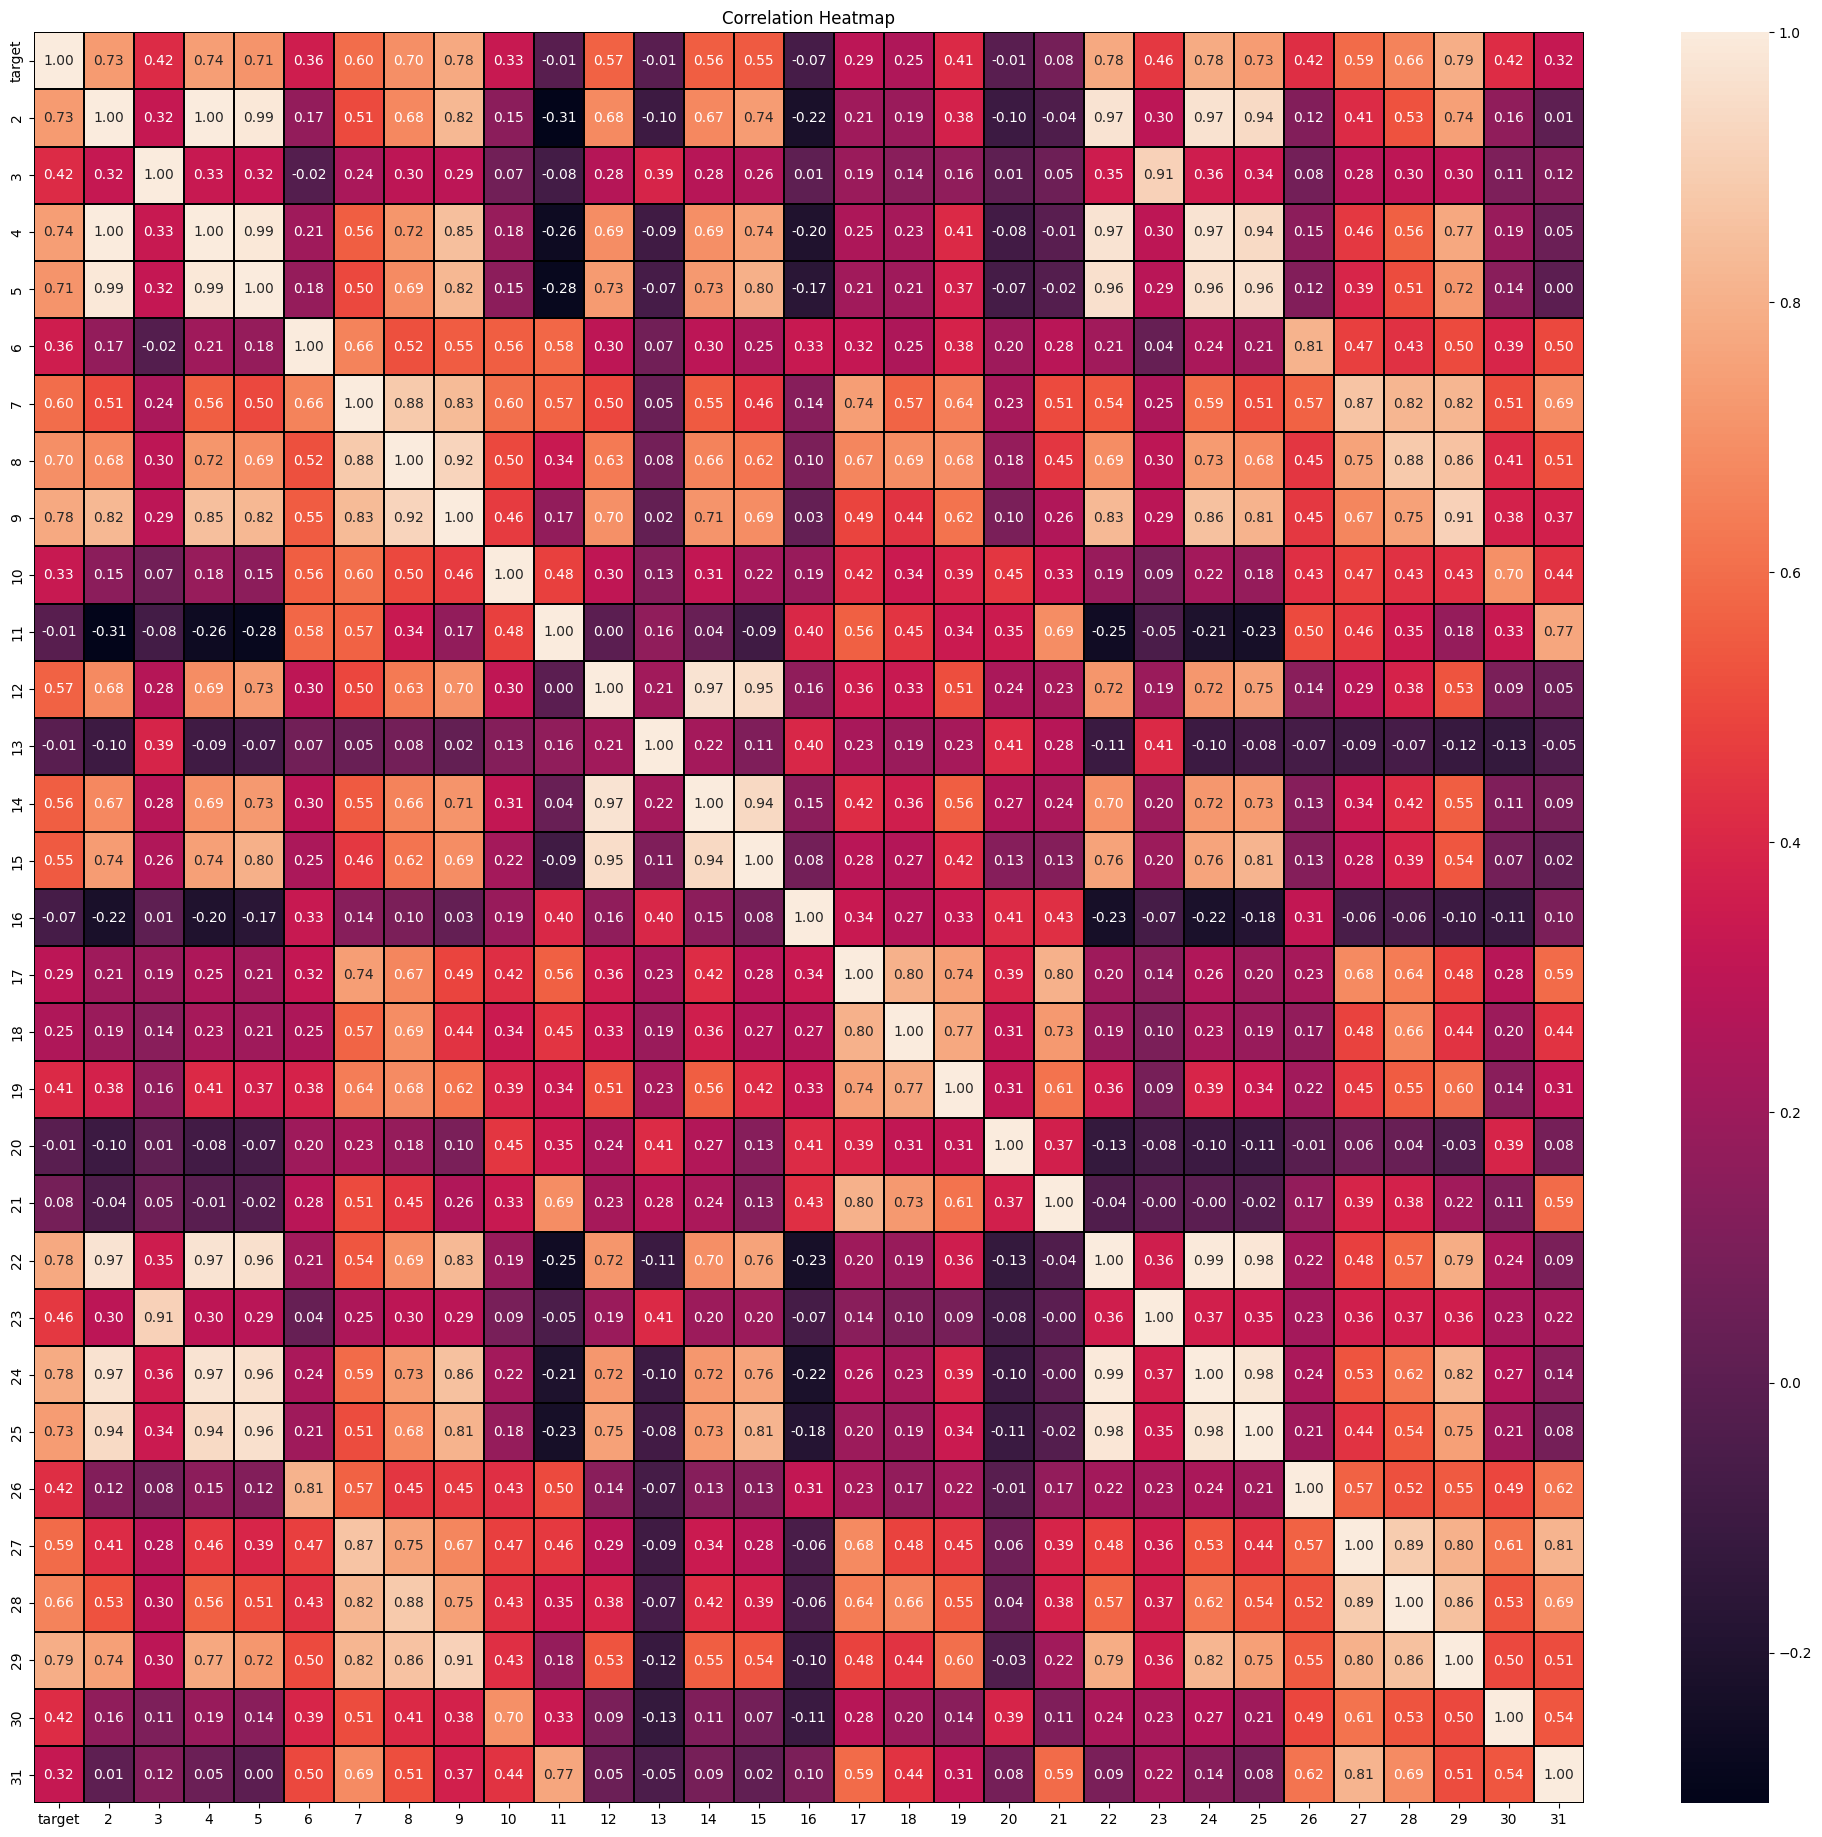

In [ ]:
plt.figure(figsize=(25,23))
sns.heatmap(cor, annot= True, linewidths= 0.3 ,linecolor = "black", fmt = ".2f")
plt.title('Correlation Heatmap')
plt.show()

- Data with a correlation greater than 0.75.

<Figure size 1000x800 with 0 Axes>

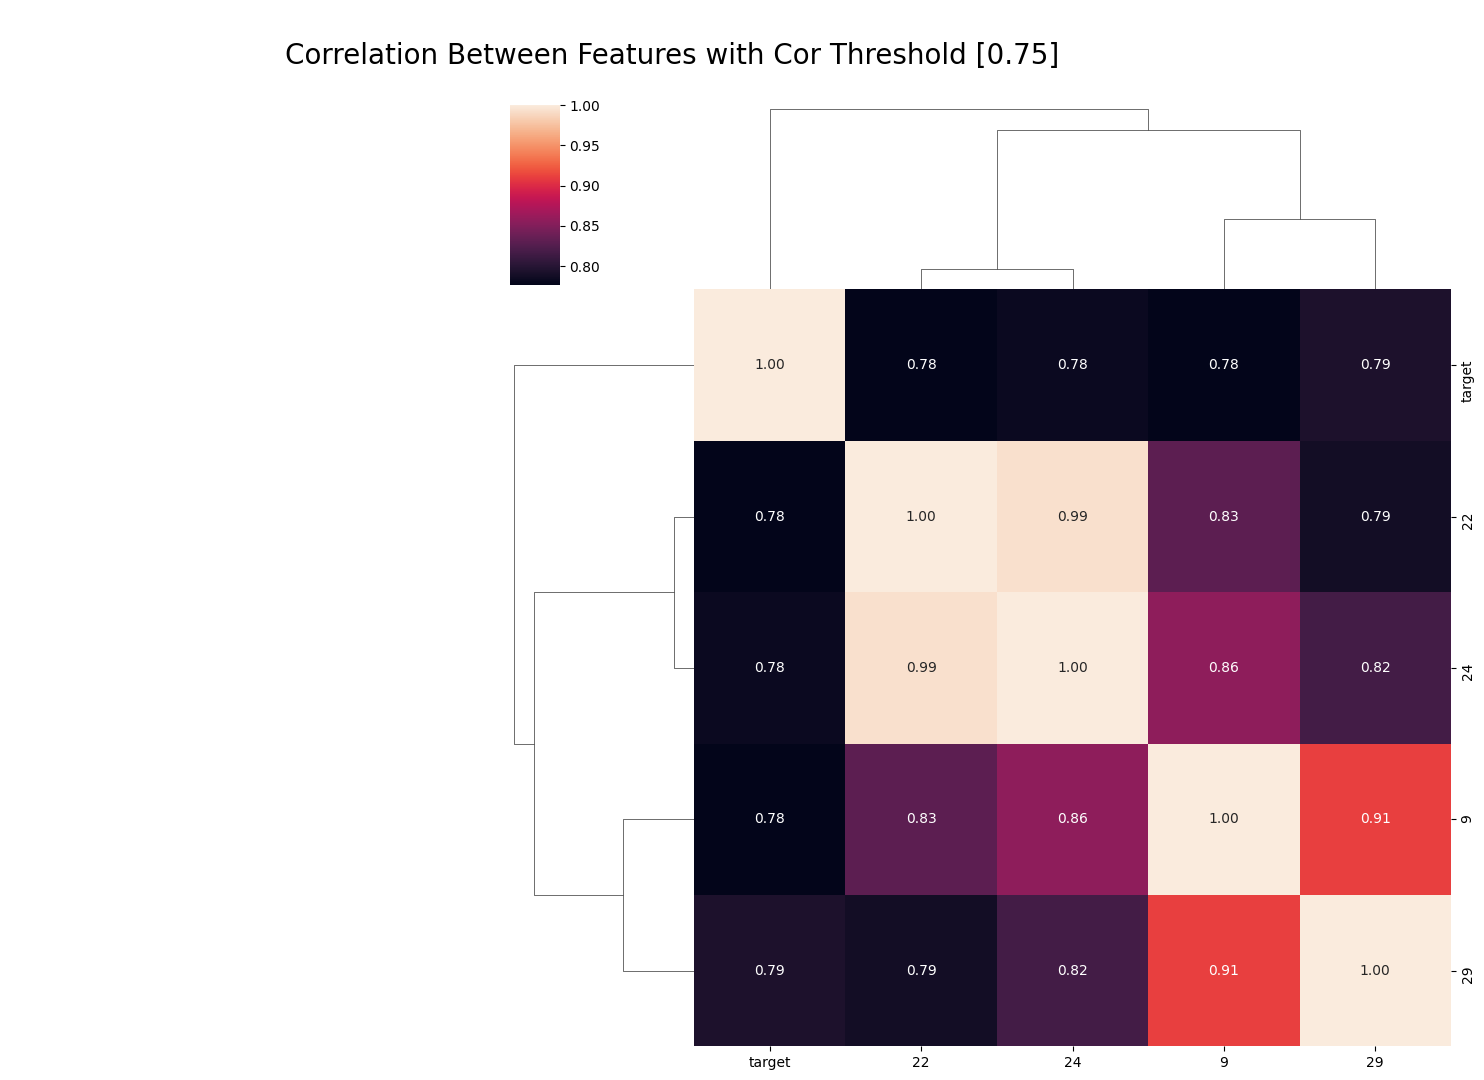

In [ ]:
threshold = 0.75
filtre = np.abs(cor["target"] > threshold)
corr_features = cor.columns[filtre].tolist()
plt.figure(figsize=(10,8))
sns.clustermap(df[corr_features].corr(), annot = True, fmt = ".2f")
plt.title("\n                               Correlation Between Features with Cor Threshold [0.75]\n",fontsize=20)
plt.show()

###  visualized the data with a correlation greater than 0.75

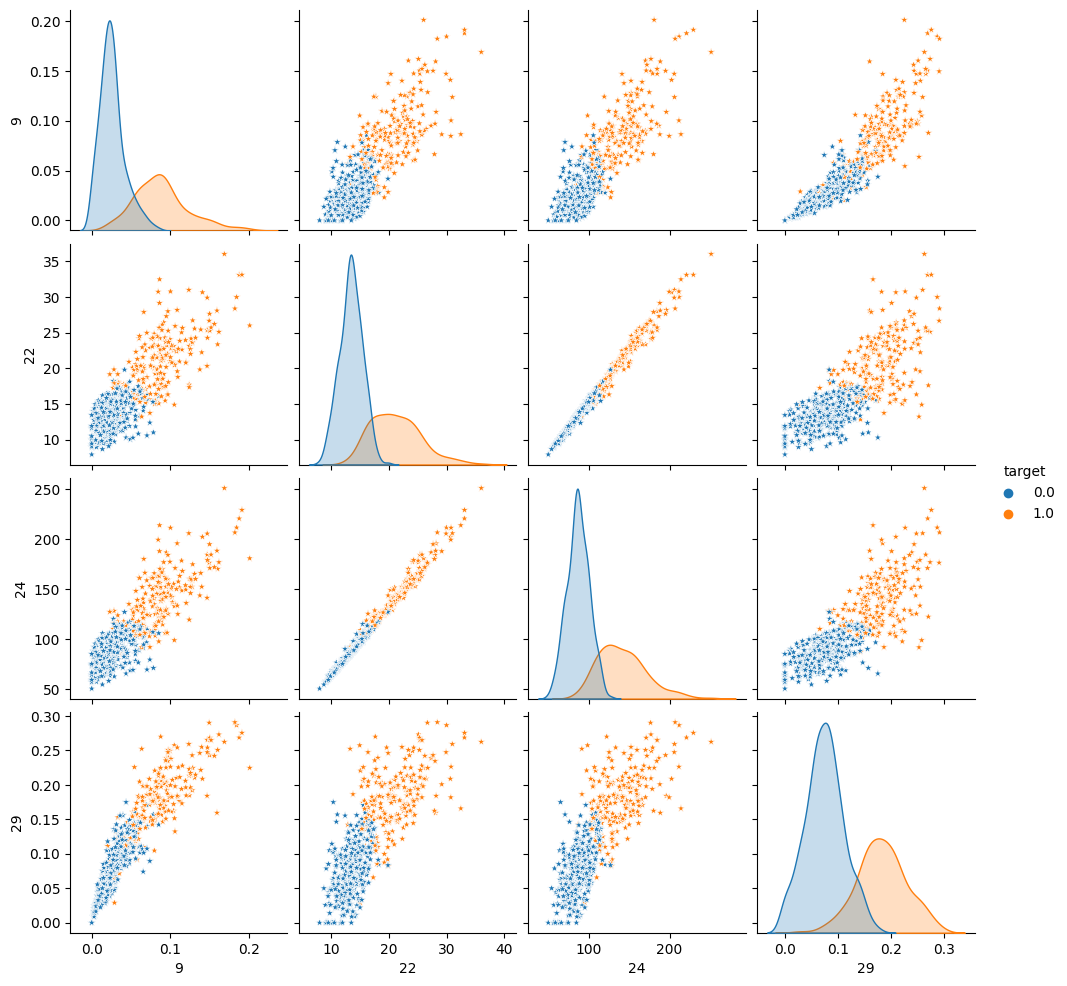

In [ ]:
sns.pairplot(df[corr_features], diag_kind = "kde" , markers = "*", hue="target")
plt.show()

# Classification algorithms


In [ ]:
# Splitting data
x= df.drop('target',axis=1)
y= df['target']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=101)

In [ ]:
s= StandardScaler()
x_train = s.fit_transform(x_train)
x_test = s.fit_transform(x_test)

In [ ]:
algorithm = ['KNeighborsClassifier','RandomForestClassifier','DecisionTreeClassifier','GaussianNB','LogisticRegression', 'SVC' ]
Accuracy=[]

In [ ]:
def all(model):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)

    acc=accuracy_score(y_test,pred)
    Accuracy.append(acc)

    # confusion matrix without Normalization
    print('confusion matrix')
    # Calculate confusion matrix
    cm = confusion_matrix(y_test,pred)
    # Plot the confusion matrix
    sns.heatmap(cm, annot=True, fmt='d',cmap=['lightsteelblue','navajowhite'])
    plt.title('Confusion matrix')
    plt.xlabel('Predicted lablel')
    plt.ylabel('True lable')
    plt.show()

    # confusion matrix without Normalization
    print('Normalized confusion matrix')
    # Calculate confusion matrix
    cm1 = confusion_matrix(y_test,pred, normalize='true')
    # Plot the confusion matrix
    sns.heatmap(cm1, annot=True,cmap=['lightsteelblue','navajowhite'])
    plt.title('Normalized Confusion  matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

    # print Confusion matrix, Classification report and accuracy report
    print(cm)
    print(classification_report(y_test,pred))
    print('accuracy_score : ' , acc)


### KNN

confusion matrix


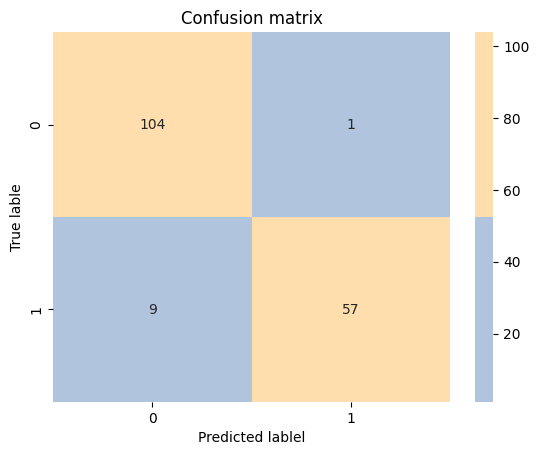

Normalized confusion matrix


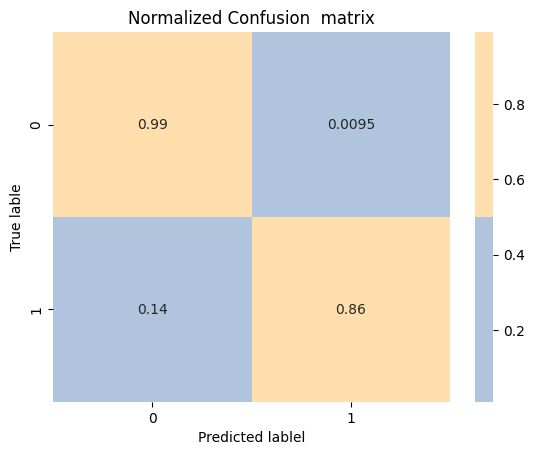

[[104   1]
 [  9  57]]
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95       105
         1.0       0.98      0.86      0.92        66

    accuracy                           0.94       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

accuracy_score :  0.9415204678362573


In [ ]:
model_1 =KNeighborsClassifier(n_neighbors=2)
all(model_1)

### RandomForest

confusion matrix


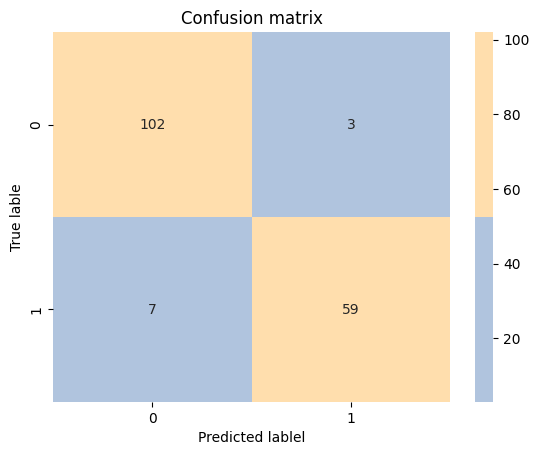

Normalized confusion matrix


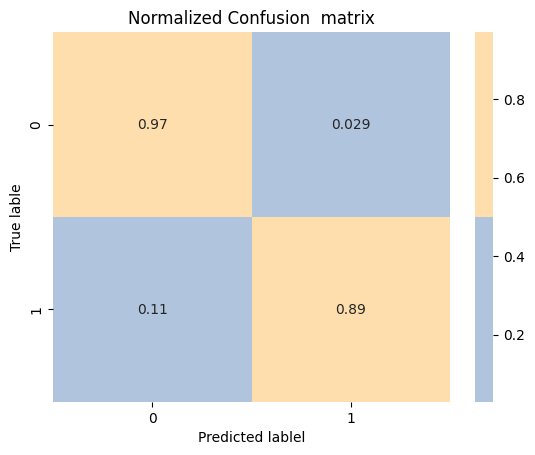

[[102   3]
 [  7  59]]
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95       105
         1.0       0.95      0.89      0.92        66

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

accuracy_score :  0.9415204678362573


In [ ]:
model_2= RandomForestClassifier(n_estimators=100,random_state=0)
all(model_2)

### DecisionTree

confusion matrix


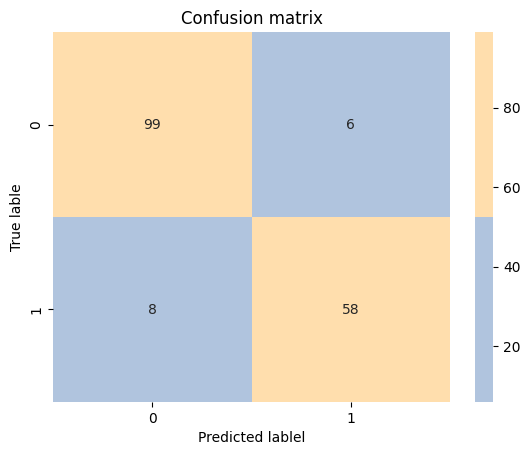

Normalized confusion matrix


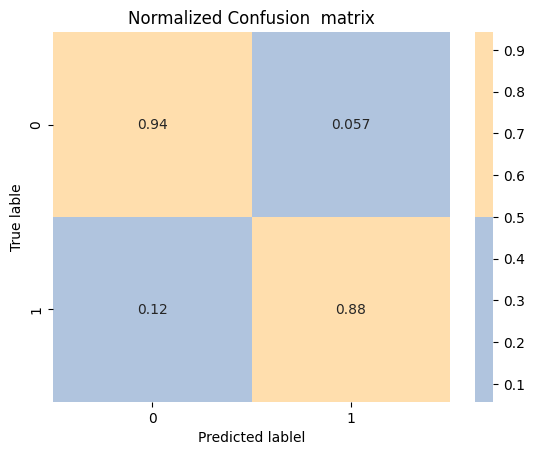

[[99  6]
 [ 8 58]]
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93       105
         1.0       0.91      0.88      0.89        66

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.91       171
weighted avg       0.92      0.92      0.92       171

accuracy_score :  0.9181286549707602


In [ ]:
model_3 = DecisionTreeClassifier(random_state=42)
all(model_3)

### Naive_bayes

confusion matrix


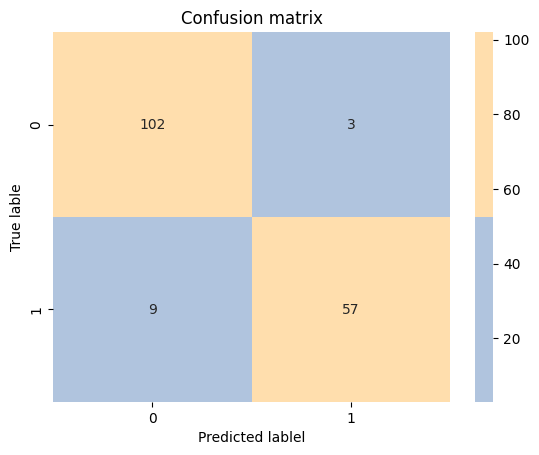

Normalized confusion matrix


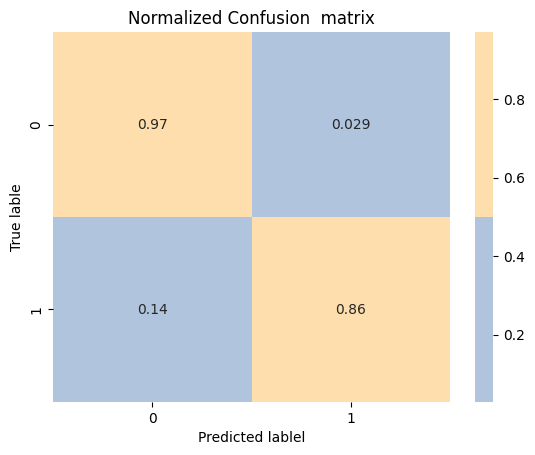

[[102   3]
 [  9  57]]
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94       105
         1.0       0.95      0.86      0.90        66

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171

accuracy_score :  0.9298245614035088


In [ ]:
model_4 = GaussianNB()
all(model_4)

### Logistic Regression

confusion matrix


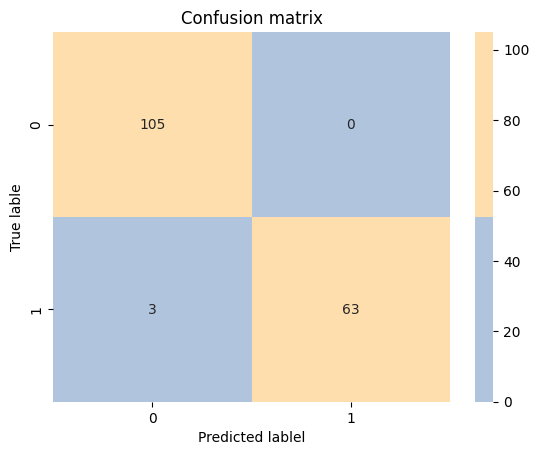

Normalized confusion matrix


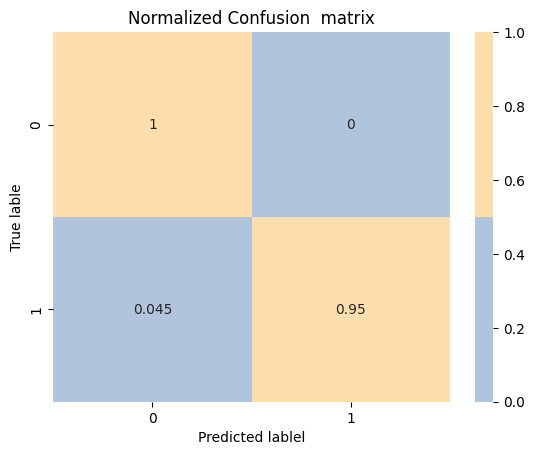

[[105   0]
 [  3  63]]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99       105
         1.0       1.00      0.95      0.98        66

    accuracy                           0.98       171
   macro avg       0.99      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

accuracy_score :  0.9824561403508771


In [ ]:
model_5 = LogisticRegression()
all(model_5)

##SVC


confusion matrix


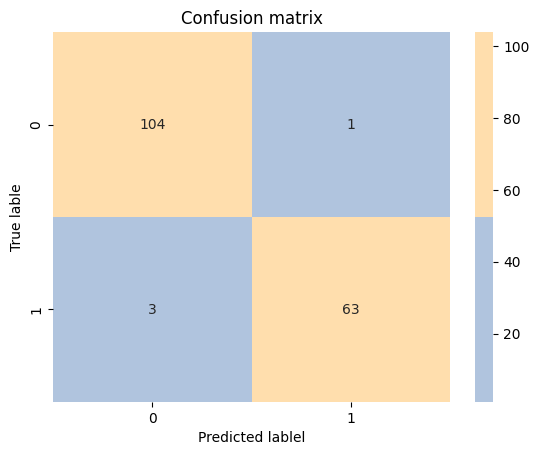

Normalized confusion matrix


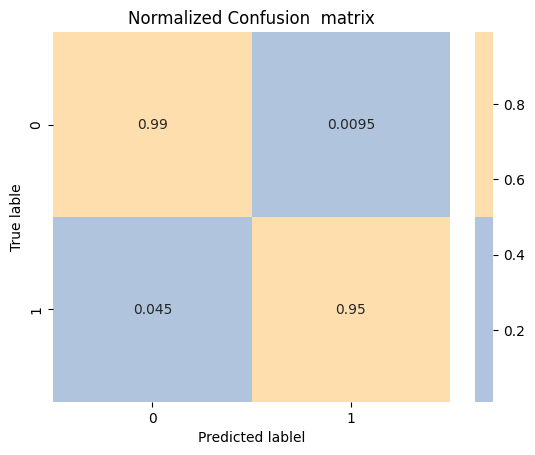

[[104   1]
 [  3  63]]
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       105
         1.0       0.98      0.95      0.97        66

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.98       171
weighted avg       0.98      0.98      0.98       171

accuracy_score :  0.9766081871345029


SVC(kernel='linear')

In [ ]:
model_6 = SVC(kernel = 'linear')
all(model_6)
model_6.fit(x_train, y_train)

In [ ]:
df = pd.DataFrame({'Algorithm':algorithm,'Accuracy':Accuracy })



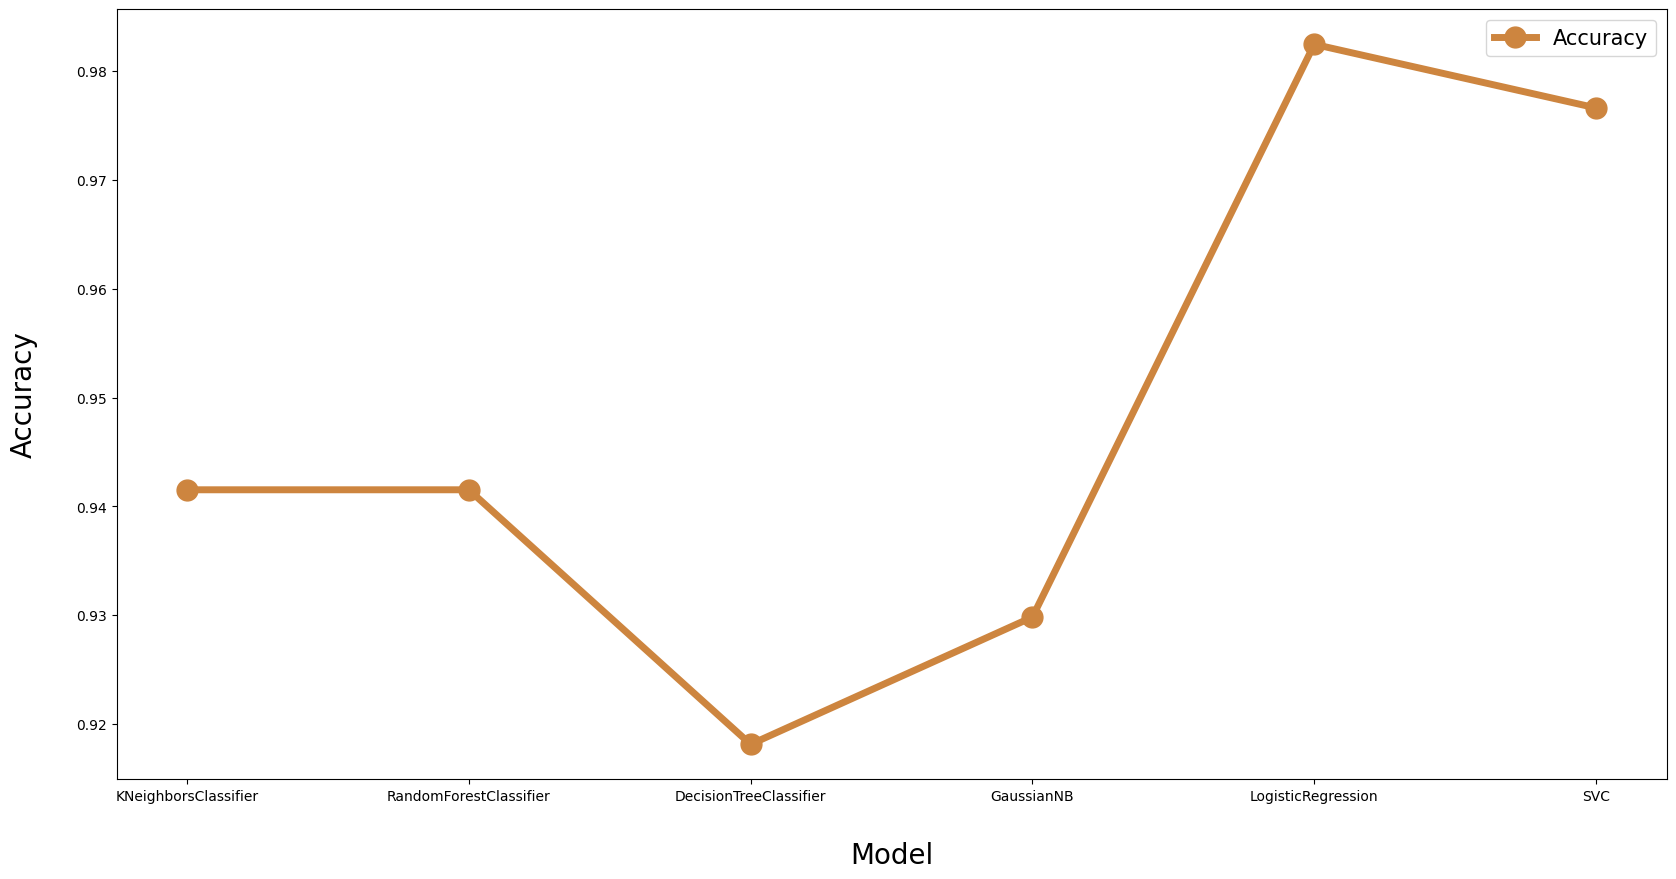

In [ ]:
fig = plt.figure(figsize=(20,10))
plt.plot(df.Algorithm,df.Accuracy,label='Accuracy',lw=5,color='peru',marker='o',markersize = 15)
plt.legend(fontsize=15)
plt.xlabel('\nModel',fontsize= 20)
plt.ylabel('Accuracy\n',fontsize= 20)
plt.show()

In [ ]:
!python --version

Python 3.10.12
